# Data cleaning and merging dataframes

## Loading multiple datasets

**Google way**

In [754]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [382]:
# import pandas as pd

# # orderlines.csv
# url = 'https://drive.google.com/file/d/14Y7g5ITyf6LMyPoKc9wr010V9StaCUux/view?usp=sharing' 
# path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
# orderlines = pd.read_csv(path)

# # orders.csv
# url = 'https://drive.google.com/file/d/1BLEHcP-9fm9Rv7A01H3co2XBMnSr66YC/view?usp=sharing' 
# path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
# orders = pd.read_csv(path)

# print(path)

# # brands.csv
# url = 'https://drive.google.com/file/d/1BrNrIY0F1LbyXtyaQygUBXVxQGB3JBqx/view?usp=sharing' 
# path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
# brands = pd.read_csv(path)

# # products.csv
# url = 'https://drive.google.com/file/d/1UfsHI80cpQqGfsH2g4T4Tsw8cWayOfzC/view?usp=sharing' 
# path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
# products = pd.read_csv(path)

# df_list = [orderlines, orders, brands, products]
# files = ['orderlines','orders','brands','products']



**Other ways**

In [755]:
import pandas as pd

path = './data/eniac/'
orderlines = pd.read_csv(path + 'orderlines.csv')
orders = pd.read_csv(path + 'orders.csv')
brands = pd.read_csv(path + 'brands.csv')
products = pd.read_csv(path + 'products.csv')

df_list = [orderlines, orders, brands, products]
files = ['orderlines','orders','brands','products']

In [384]:
# import pandas as pd
# import os
# path = '../data/eniac/'
# path, dirs, files = next(os.walk(path))
# #print(files)

# # remove non-csv files
# for file in files:
#     if not file.endswith("csv"):
#         files.remove(file)

# # create empty list 
# df_list = []

# # append datasets to the list
# for file in files:
#     temp_df = pd.read_csv(path + file, sep=',')
#     df_list.append(temp_df)

# # show results
# products, orders, orderlines, brands = df_list[0], df_list[1], df_list[2], df_list[3]

## Data quality

### Missing values

In [756]:
#check missing values for the whole dataframe
orderlines.isna().sum().sum()

0

In [757]:
# check missing values column
orderlines.isna().sum()

id                  0
id_order            0
product_id          0
product_quantity    0
sku                 0
unit_price          0
date                0
dtype: int64

In [387]:
orderlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293983 entries, 0 to 293982
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                293983 non-null  int64 
 1   id_order          293983 non-null  int64 
 2   product_id        293983 non-null  int64 
 3   product_quantity  293983 non-null  int64 
 4   sku               293983 non-null  object
 5   unit_price        293983 non-null  object
 6   date              293983 non-null  object
dtypes: int64(4), object(3)
memory usage: 15.7+ MB


In [758]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226909 entries, 0 to 226908
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   order_id      226909 non-null  int64  
 1   created_date  226909 non-null  object 
 2   total_paid    226904 non-null  float64
 3   state         226909 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 6.9+ MB


In [759]:
brands.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   short   187 non-null    object
 1   long    187 non-null    object
dtypes: object(2)
memory usage: 3.0+ KB


In [760]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19326 entries, 0 to 19325
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sku          19326 non-null  object
 1   name         19326 non-null  object
 2   desc         19319 non-null  object
 3   price        19280 non-null  object
 4   promo_price  19326 non-null  object
 5   in_stock     19326 non-null  int64 
 6   type         19276 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.0+ MB


### Duplicates

The presence of duplicate rows is generally a sign that the data is not clean, and will deserve further exploration.

In [761]:
orderlines.duplicated().sum()

0

In [762]:
orders.duplicated().sum()

0

In [763]:
brands.duplicated().sum()

0

In [764]:
products.duplicated().sum()

8746

In [765]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19326 entries, 0 to 19325
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sku          19326 non-null  object
 1   name         19326 non-null  object
 2   desc         19319 non-null  object
 3   price        19280 non-null  object
 4   promo_price  19326 non-null  object
 5   in_stock     19326 non-null  int64 
 6   type         19276 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.0+ MB


### Data cleanliness - initial assessment

Based on our initial exploration, we know we will need to deal with some missing values. The biggest issue so far are the duplicates on the `products` DataFrame. Here are some aspects that we will need to fix or, at least, explore further:

* **products**: 
    * `price` and `promo_price` are loaded as objects. They should be floats. 
    * Missing values: 
        * `description`: 7 missing values. Maybe that could be inferred from the product name?
        * `price`: the missing values could be filled from the `orderlines` dataset. But first we will need to clean it. 
    * Duplicates: a total of 8746 duplicates seems to indicate this DataFrame has been seriously corrupted.
    
* **orders**: 
    * `created_date` should have a date data type. Then, it would be a good quality check to see if the created date for `orders` matches with the created dates for `orderlines`. 
    
* **orderlines**: 
    * `unit_price` has to be a float, something is wrong there. 
    * `date` has to be transformed to a date data type. Then, as we said, check that it matches with the `orders` dataset. 
    
* **brands**: looks fine. 

Where do we have to start? 

1. **Data consistency:** Since `orders` and `orderlines` seem very crucial to the analysis, we will start by cleaning them and checking that the information present in both DataFrames match.

2. **The "products mess":** This file seems to have many issues. We will leave it out for now and perform a proper exploration later to understand better what's going on there.

## Cleaning orders

The data consistency check we will do with `orderlines` will involve two steps: 

* the initial and last dates of the orders should be the same
* the sum of `total_paid` on both datasets should be the same

Let's start by transforming the `created_date` of the orders DataFrame and looking for its earliest and latest values:

In [766]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226909 entries, 0 to 226908
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   order_id      226909 non-null  int64  
 1   created_date  226909 non-null  object 
 2   total_paid    226904 non-null  float64
 3   state         226909 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 6.9+ MB


In [767]:
# change date datatype
orders['created_date'] = pd.to_datetime(orders['created_date'])

In [768]:
# earliest value
min(orders['created_date'])

Timestamp('2017-01-01 00:07:19')

In [769]:
# latest value
max(orders['created_date'])

Timestamp('2018-03-14 13:58:36')

Now we will look at the overall sum of `total_paid` for the orders table:

In [770]:
sum(orders['total_paid'])

nan

the result of the sum is a nan (not a number).
here are missing values! We can explore them and see how they are all "Pending" orders:

In [771]:
orders.loc[orders['total_paid'].isna()]

,order_id,created_date,total_paid,state
127701,427314,2017-11-20 18:54:39,NaN,Pending
132013,431655,2017-11-22 12:15:24,NaN,Pending
147316,447411,2017-11-27 10:32:37,NaN,Pending
148833,448966,2017-11-27 18:54:15,NaN,Pending
149434,449596,2017-11-27 21:52:08,NaN,Pending


its not necessary, but i want to search the orderliness to find if this missed orders exist. then i calculate the total_price from the orderlines to this missed datas

In [772]:
missed_orders =(
orders
      .loc[orders['total_paid'].isna()]
)

missed_orders.assign(check_orders = missed_orders['order_id'].isin(orderlines['id_order']))

,order_id,created_date,total_paid,state,check_orders
127701,427314,2017-11-20 18:54:39,NaN,Pending,True
132013,431655,2017-11-22 12:15:24,NaN,Pending,True
147316,447411,2017-11-27 10:32:37,NaN,Pending,True
148833,448966,2017-11-27 18:54:15,NaN,Pending,True
149434,449596,2017-11-27 21:52:08,NaN,Pending,True


we can recalculate all 5 missed values from orderlines, lets to calculate them 

In [773]:
missed_orders_total_paid = (
missed_orders
            .merge(
                    orderlines, 
                    how= 'inner', 
                    left_on= 'order_id',
                    right_on= 'id_order'
                  )
            .assign(unit_price_new = lambda df_ : df_['unit_price'].replace(r'(\d*)\.(\d{3}\.\d{2})$', r'\1\2', regex= True).astype('float'))
            .groupby('order_id')
            .agg(repaired_total_price = ('unit_price_new', 'sum'))
            .reset_index()
)
missed_orders_total_paid 

,order_id,repaired_total_price
0,427314,75.99
1,431655,154.00
2,447411,180.76
3,448966,961.02
4,449596,1722.59


and now ill fill the missed values with my new values

In [774]:
def get_total_price(order):
  result = (
            missed_orders_total_paid
           .merge(
                  order,
                  how= 'right',
                  left_on= 'order_id',
                  right_on= 'order_id'
                  )
           .loc[:,'repaired_total_price']
  )
  return result

orders = orders.fillna(value ={"total_paid" : get_total_price(orders['order_id']) })

orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226909 entries, 0 to 226908
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   order_id      226909 non-null  int64         
 1   created_date  226909 non-null  datetime64[ns]
 2   total_paid    226909 non-null  float64       
 3   state         226909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.9+ MB


**extra** : Since these orders are only a tiny fraction and there's a valid reason why the total_paid value is missing, we could simply exclude them from the dataset.

In [405]:
# orders.dropna(inplace=True)

Now the dataset is clean. And the total paid is: 

In [775]:
sum(orders['total_paid'])

129162709.42991276

## Cleaning orderlines

Following our data consistency check, will now gather in the orderlines DataFrame the same information we got from orders:

* the initial and last dates
* the sum of `total_paid`


First let's transform our date time:

In [776]:
orderlines['date'] = pd.to_datetime(orderlines['date'])

In [777]:
min(orderlines['date'])
# orders: Timestamp('2017-01-01 00:07:19')

Timestamp('2017-01-01 00:07:19')

In [778]:
max(orderlines['date'])
# orders: Timestamp('2018-03-14 13:58:36')

Timestamp('2018-03-14 13:58:36')

**It's a match!**

Now let's check the `total_paid` for orderlines:

In [779]:
orderlines.head(3)

,id,id_order,product_id,product_quantity,sku,unit_price,date
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57


To get this value, we will have to calculate a new column, total price for each row. It would be product_quantity * unit_price. This operation will require that both columns have a numeric data type:

In [411]:
orderlines.dtypes

id                           int64
id_order                     int64
product_id                   int64
product_quantity             int64
sku                         object
unit_price                  object
date                datetime64[ns]
dtype: object

...it's not the case right now, so we will have to transform the unit_price to a numeric data type.


In [412]:
# uncomment the line of code below and read the error it produces:
# orderlines['product_quantity']*pd.to_numeric(orderlines['unit_price'])

While trying to transform this column to numeric an error appears. From the error message,

"Unable to parse string '1.137.99' at position 6"

it seems that our dataset has some problems with the thousands separators: they were encoded as dots, and Python & pandas only admit one dot per number: the decimal separator!

Lesson learned: do not use thousand separators in databases / statistical software / programming languages! Sadly, it's too late for us, and we will have to deal with the issue.

There are many ways to approach this problem.

i use a replace regex pattern to remove the thousand point, and then i convert the unit price to float. and add the new values in a new column "new_unit_price"

In [787]:
(
orderlines
        # .loc[orderlines['unit_price'].str.match(r'.*\.\d{3}$')]
        .loc[orderlines['id_order']==365562]
)

,id,id_order,product_id,product_quantity,sku,unit_price,date
76644,1267994,365562,0,1,APP2266,2.489.00,2017-06-14 13:00:17
76645,1267995,365562,0,1,APP1987,989.00,2017-06-14 13:01:10
76646,1267996,365562,0,1,APP1190,70.00,2017-06-14 13:01:49
76647,1267997,365562,0,1,APP0663,249.00,2017-06-14 13:02:02
76649,1268000,365562,0,1,APP1691,49.49,2017-06-14 13:03:28
76650,1268001,365562,0,1,APP1043,74.99,2017-06-14 13:04:06


In [791]:
orderlines= (
orderlines    
        .assign(new_unit_price = lambda df_ : df_['unit_price'].replace(r'(\d*)\.(\d{3}\.\d{2})$', r'\1\2', regex= True).astype('float'))
)

In [792]:
orderlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293983 entries, 0 to 293982
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                293983 non-null  int64         
 1   id_order          293983 non-null  int64         
 2   product_id        293983 non-null  int64         
 3   product_quantity  293983 non-null  int64         
 4   sku               293983 non-null  object        
 5   unit_price        293983 non-null  object        
 6   date              293983 non-null  datetime64[ns]
 7   new_unit_price    293983 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 17.9+ MB


Data cleaning done! 

Back to data consistency: Now it is time to multiply `product_quantity` and `unit price`, sum all the rows and check whether the value matches the sum of the `total_paid` from the orders DataFrame: 

In [793]:
# create a new column "total_price" by multiplying product_quantity times unit_price
orderlines =(
orderlines
        .assign(total_price = lambda df_ : df_['product_quantity'] * df_['new_unit_price'])
)

# sum of the new column "total_price":
orderlines['total_price'].sum()

128776222.02999999

Sadly, it does not match exactly with the sum of `total_paid` from orders:

In [794]:
orders['total_paid'].sum()

129162709.43

The mismatch is about 386 thousand dollars, a non-neglegible amount of money:

In [795]:
orderlines['total_price'].sum() - orders['total_paid'].sum()

-386487.40000002086

## Matching `orders` and `orderlines`

It is possible that some orders exist in one dataset but not in the other one. This would be a potential source for this price mismatch. Let's find out!

We first create a new column in the `orderlines` dataset using `assign`. We also use `isin()` to create a boolen value (True/False) that checks whether the `id_order` is present in the `orders` dataset:

In [796]:
orderlines.assign(check_orders = orderlines['id_order'].isin(orders['order_id']))

,id,id_order,product_id,product_quantity,sku,unit_price,date,new_unit_price,total_price,check_orders
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19,18.99,18.99,True
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45,399.00,399.00,True
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57,474.05,474.05,True
3,1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40,68.39,68.39,True
4,1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38,23.74,23.74,True
...,...,...,...,...,...,...,...,...,...,...
293978,1650199,527398,0,1,JBL0122,42.99,2018-03-14 13:57:25,42.99,42.99,True
293979,1650200,527399,0,1,PAC0653,141.58,2018-03-14 13:57:34,141.58,141.58,True
293980,1650201,527400,0,2,APP0698,9.99,2018-03-14 13:57:41,9.99,19.98,True
293981,1650202,527388,0,1,BEZ0204,19.99,2018-03-14 13:58:01,19.99,19.99,True


Then, using `.query` we select rows where the value in this new column is `False`:

In [797]:
(
orderlines
    .assign(check_orders = orderlines['id_order'].isin(orders['order_id']))
    .query("check_orders==False")
)

,id,id_order,product_id,product_quantity,sku,unit_price,date,new_unit_price,total_price,check_orders
5,1119114,295310,0,10,WDT0249,231.79,2017-01-01 01:14:27,231.79,2317.90,False
63,1119218,296284,0,1,BNQ0042,699.00,2017-01-01 09:58:35,699.00,699.00,False
67,1119223,294806,0,1,APP1849,2.558.99,2017-01-01 10:09:15,2558.99,2558.99,False
69,1119226,294806,0,1,APP1864,2.797.99,2017-01-01 10:15:14,2797.99,2797.99,False
70,1119235,297261,0,1,QNA0177,304.99,2017-01-01 10:17:59,304.99,304.99,False
...,...,...,...,...,...,...,...,...,...,...
275665,1621177,244328,0,1,OWC0260,349.00,2018-02-20 13:00:45,349.00,349.00,False
280055,1628699,261391,0,1,APP2352,3.343.00,2018-02-27 11:43:25,3343.00,3343.00,False
280352,1629247,287797,0,1,SYN0182,484.11,2018-02-27 19:16:26,484.11,484.11,False
280856,1630150,261391,0,1,SAT0091,44.99,2018-02-28 12:18:26,44.99,44.99,False


It looks like 234 rows in orderlines come from orders not present in the orders dataset. This is quite inconsistent, since the orders dataset should be the one and only source of truth for orders: if an order is not there, it should not exist. We will definitely report this anomaly, but for now, let's just remove those "ghost" orders:

In [798]:
orderlines = (orderlines
              .assign(check_orders = orderlines['id_order'].isin(orders['order_id']))
              .query("check_orders==True"))

Now let's look at this problem in the opposite direction: are there orders in the `orders` dataset not present in `orderlines`?

In [799]:
(orders
 .assign(check_orders = orders['order_id'].isin(orderlines['id_order']))
 .query("check_orders==False"))

,order_id,created_date,total_paid,state,check_orders
8,245941,2017-01-01 10:32:23,183.52,Completed,False
65,268629,2017-01-31 11:27:25,73.23,Completed,False
75,272862,2017-04-18 18:17:10,128.99,Pending,False
82,277655,2017-02-01 08:44:55,9.99,Pending,False
83,277994,2017-01-23 18:30:11,52.99,Completed,False
...,...,...,...,...,...
226835,527328,2018-03-14 13:14:12,0.00,Shopping Basket,False
226851,527344,2018-03-14 13:25:21,0.00,Place Order,False
226853,527346,2018-03-14 13:26:14,0.00,Place Order,False
226855,527348,2018-03-14 13:28:18,0.00,Place Order,False


There are more than 22000 orders in the `orders` dataset that are not present on the `orderlines` dataset!!! We can try to find out why by looking at the state of these orders:

In [800]:
(orders
 .assign(check_orders = orders['order_id'].isin(orderlines['id_order']))
 .query("check_orders==False")
 ['state'].value_counts())

Place Order        12304
Shopping Basket     9810
Completed             45
Cancelled             41
Pending               13
Name: state, dtype: int64

It looks like most of them are orders that were not fully completed: the products were left in the shopping basket or the order was "placed" but maybe not paid (hence the state "Place Order". Some of them were "Completed", though. 

This will require further research, and we might have to come back to these orders if we have to explore consumer behaviour (e.g. why are orders left in the shopping basket?), but for now, for the sake of data consistency, let's drop all of these unmatched orders:

In [801]:
orders = (orders
          .assign(check_orders = orders['order_id'].isin(orderlines['id_order']))
          .query("check_orders==True")
         )

Let's now check again if the total paid matches:

In [802]:
orders['total_paid'].sum()

129133971.54

In [803]:
orderlines['total_price'].sum()

128662488.13

TILL NOT MATCHING!!! And actually, the difference got larger. This is outrageous. Let's keep exploring.

In [804]:
orders['total_paid'].sum() - orderlines['total_price'].sum() 

471483.4100000113

## Solving the price mismatch

Let's merge both datasets and compare, order by order, the `total_price`. We will call this new merged dataset `orders_info`.

*Note: Remember that the `orderlines` dataset contains one row per product bought: an order where 3 different products were purchased will result in 3 rows there. Therefore, to merge `orderlines` with `orders`, we have to group `orderlines` by its `id_order` and aggregate it by taking the sum of the `total_price`.

In [805]:
orders_info = (
orderlines
    .groupby('id_order')
    .agg({'total_price':'sum'})
    .merge(orders, how='left', left_on='id_order', right_on='order_id')
)
orders_info

,total_price,order_id,created_date,total_paid,state,check_orders
0,44.99,241319,2017-01-02 13:35:40,44.99,Cancelled,True
1,129.16,241423,2017-11-06 13:10:02,136.15,Completed,True
2,10.77,242832,2017-12-31 17:40:03,15.76,Completed,True
3,77.99,243330,2017-02-16 10:59:38,84.98,Completed,True
4,153.87,243784,2017-11-24 13:35:19,157.86,Cancelled,True
...,...,...,...,...,...,...
204691,42.99,527397,2018-03-14 13:56:38,42.99,Place Order,True
204692,42.99,527398,2018-03-14 13:57:25,42.99,Shopping Basket,True
204693,141.58,527399,2018-03-14 13:57:34,141.58,Shopping Basket,True
204694,19.98,527400,2018-03-14 13:57:41,19.98,Shopping Basket,True


Now that the `total` from both datasets is in the same dataframe, we can create a new column with the difference:

In [806]:
orders_info['price_difference'] = orders_info['total_paid'] - orders_info['total_price'] 
orders_info.sort_values('price_difference')

,total_price,order_id,created_date,total_paid,state,check_orders,price_difference
56804,250802.37,361200,2017-06-01 11:55:02,214642.47,Shopping Basket,True,-36159.90
197894,7771.23,519801,2018-03-02 08:59:34,31.22,Shopping Basket,True,-7740.01
188174,3112.59,508818,2018-02-09 13:43:30,6.59,Shopping Basket,True,-3106.00
193916,3038.00,515325,2018-02-21 11:31:20,13.19,Shopping Basket,True,-3024.81
192918,2342.00,514198,2018-02-19 11:40:55,6.59,Shopping Basket,True,-2335.41
...,...,...,...,...,...,...,...
12387,10322.92,313023,2017-01-21 21:12:41,14648.91,Shopping Basket,True,4325.99
45740,12.90,349166,2017-04-24 11:40:42,12899.80,Shopping Basket,True,12886.90
119474,42.99,431635,2017-11-22 12:01:15,42988.90,Shopping Basket,True,42945.91
32392,79.98,334803,2017-03-13 20:41:31,79981.00,Shopping Basket,True,79901.02


In [807]:
orders_info['price_difference'].describe()

count    204696.000000
mean          2.303335
std         297.458195
min      -36159.900000
25%           0.000000
50%           0.000000
75%           0.010000
max       90898.610000
Name: price_difference, dtype: float64

Looks like the maximum and minimum price differences are huge: some orders are really corrupted. But we also see from the mean and the quartiles that the price difference is neglegible for most orders.

## Remove outliers

Decide on a criterion for removing orders whenever you cannot trust the price difference between `orders` and `orderlines`. 

Note: this solution does not completely achieve 100% trustable data, but the objective here is to end up with the best possible data within a limited amount of time, which makes a complete revision of the database protocols and the data pipelines is not feasible - and business questions are pending. Documenting and reporting this data cleaning process, including the criterion that you will use for determining what do you consider an "outlier", is key. Not being paralyzed by it is also important!

Finding Outliers Using the Interquartile Rule

We can use the interquartile range to identify outliers

Determine the data's interquartile range.
Multiply the interquartile range (IQR) by 1.5 - call this 1.5_iqr
Add 1.5_iqr to the 75th percentile. Any figure above this is thought to be an outlier.
Subtract 1.5_iqr from the 25th percentile. Any value below this is thought to be an outlier.
Just keep in mind that the interquartile rule is simply a generalisation, not all situations call for it. In general, you should always check to see if the resulting outliers make sense by reviewing them after conducting your outlier analysis.

In [808]:
# Calculate the 25th & 75th percentiles
Q1 = orders_info['price_difference'].quantile(0.25)
Q3 = orders_info['price_difference'].quantile(0.75)
# Calculate the interquartile range
IQR = Q3-Q1

# after data exploring maybe there is shipping costs added to the total paid
# i try to add 10$ dollars for ignore this difference
shipping_cost = 10
# filter the DataFrame to include only "non-outliers"
filtered = orders_info.loc[(orders_info['price_difference'] >= (Q1 - 1.5*IQR)) & (orders_info['price_difference'] <= ((Q3 + 1.5*IQR)+shipping_cost)), :]

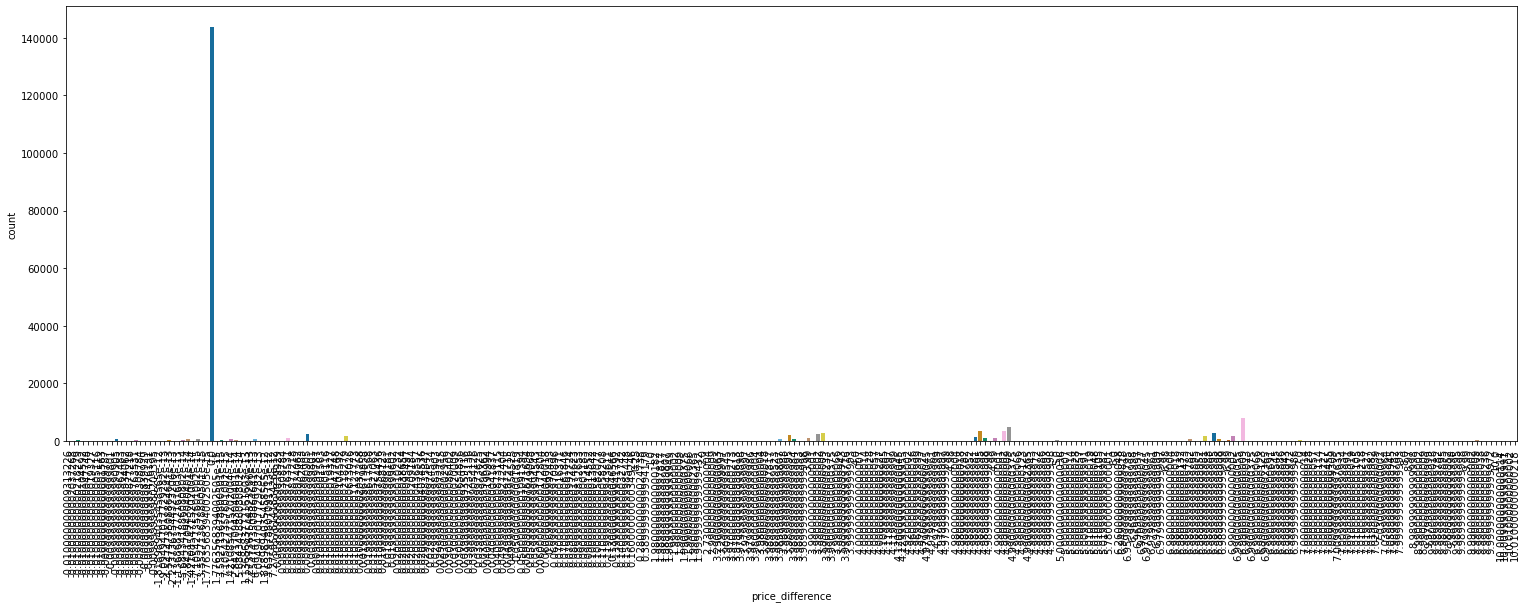

In [809]:
plt.subplots(figsize=(26, 8))

ax = sns.countplot(x="price_difference", 
                   data=filtered,
                #    ax=[-10,10,-1000,100],
                   palette="colorblind" # try deep, muted, pastel, bright, dark, and colorblind
                   )
# ax.set_xticks([-5,5])
# plt.ylim(0, 1000)
# plt.xlim(0,15)
plt.xticks(rotation = 90)
# ax.set_xlim(left=0, right=15)
plt.show()

In [810]:
filtered.head()

,total_price,order_id,created_date,total_paid,state,check_orders,price_difference
0,44.99,241319,2017-01-02 13:35:40,44.99,Cancelled,True,0.00
1,129.16,241423,2017-11-06 13:10:02,136.15,Completed,True,6.99
2,10.77,242832,2017-12-31 17:40:03,15.76,Completed,True,4.99
3,77.99,243330,2017-02-16 10:59:38,84.98,Completed,True,6.99
4,153.87,243784,2017-11-24 13:35:19,157.86,Cancelled,True,3.99


In [811]:
filtered.shape

(202352, 7)

In [812]:
# upper limit
Q3 + 1.5*IQR +shipping_cost

10.024999999999977

In [813]:
# lower limit
Q1 - 1.5*IQR 

-0.014999999999986358

Save the data once you are sure you can trust it!

In [814]:
orderlines= (
orderlines
        .loc[ orderlines['id_order'].isin(filtered['order_id'])]
)


orders= (
orders
    .loc[ orders['order_id'].isin(filtered['order_id'])]
)


In [815]:
orderlines['total_price'].sum() - orders['total_paid'].sum()

-255110.94000001252

## Cleaning products

Now it is time to clean the products dataset. Let's do a quick review of its major problems: 

In [816]:
print(products.info(), "\n")
print("Missing values:", products.isna().sum(), "\n")
print("Duplicate rows:", products.duplicated().sum())
print("Duplicate rows:", products.duplicated(subset='sku').sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19326 entries, 0 to 19325
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sku          19326 non-null  object
 1   name         19326 non-null  object
 2   desc         19319 non-null  object
 3   price        19280 non-null  object
 4   promo_price  19326 non-null  object
 5   in_stock     19326 non-null  int64 
 6   type         19276 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.0+ MB
None 

Missing values: sku             0
name            0
desc            7
price          46
promo_price     0
in_stock        0
type           50
dtype: int64 

Duplicate rows: 8746
Duplicate rows: 8747


Looking at this overview, we can see that there are different things that have to be changed: 

* Data types: 
    * `price` should be a float
    * `promo price` should be a float
* Duplicated rows. They have to be removed. 
    * To accomplish this step you can use the method `pd.DataFrame.drop_duplicates()`. Be sure you drop all the duplicates based on the column **sku**, as it is the one you will use to merge with orderlines. 
* Missing values: 
    * Description maybe can be inferred by the name
    * `price`. Is there a way we can extract the information from another table?
    * `type`. Do we need this column for our analysis?
    
This task can be accomoplished by using all the methods you already know.

*Duplicates*

In [817]:
products.drop_duplicates(subset= 'sku', inplace= True)

## Matching `products` and `orderlines`

It is possible that some product exist in one dataset but not in the other one. Let's find out!

The products with sku s that didnt appear in orderlines, they didnt sold at all, and we can ignore them.

In [828]:
sold_skus =(
    orderlines
            .groupby('sku')
            .agg(max_price = ('new_unit_price', 'max'), count_sold = ('new_unit_price', 'count'))
            .reset_index()
)
sold_products=(
    products
        .loc[products['sku'].isin(sold_skus['sku'])]
        .reset_index(drop= True)
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sku          7829 non-null   object
 1   name         7829 non-null   object
 2   desc         7823 non-null   object
 3   price        7806 non-null   object
 4   promo_price  7829 non-null   object
 5   in_stock     7829 non-null   int64 
 6   type         7815 non-null   object
dtypes: int64(1), object(6)
memory usage: 428.3+ KB


and from the others direction

In [821]:
(
orderlines
        .loc[lambda df_ :  df_['sku'].isin(products['sku'])]
)['sku'].count() - orderlines['sku'].count()

-1388

there is 1388 orderlines that have a sku dosent exist in products. and we will delete them.

In [822]:
orderlines_last_v =(
orderlines
        .loc[lambda df_ :  df_['sku'].isin(products['sku'])]
)

and we had to check the orders again to matchit with products and orderlines

In [823]:
(
orders
        .loc[orders['order_id'].isin(orderlines_last_v['id_order'])]
)['order_id'].count()- orders['order_id'].count()

-631

there is 631 orders that have no orderlines more. just drop them.

In [824]:
orders_last_v=(
orders
        .loc[orders['order_id'].isin(orderlines_last_v['id_order'])]
)

*Deal with the "price" column*

now we can recalculate the missed prices with the max price for that product in orderlines.


In [827]:

recoverd_values = (
orderlines_last_v
        .groupby('sku')
        .agg(max_price = ('new_unit_price', 'max'))
        .reset_index()
        .merge(
                sold_products,
                how= 'right',
                on='sku'
        )                           
)
recoverd_values.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7829 entries, 0 to 7828
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sku          7829 non-null   object 
 1   max_price    7829 non-null   float64
 2   name         7829 non-null   object 
 3   desc         7823 non-null   object 
 4   price        7806 non-null   object 
 5   promo_price  7829 non-null   object 
 6   in_stock     7829 non-null   int64  
 7   type         7815 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 550.5+ KB


In [831]:
sold_products= (
sold_products
        .assign(new_price =np.where(
                                    sold_products['price'].isna(),
                                    recoverd_values['max_price'], sold_products['price']
                                )
                )
)
# sold_products.loc[lambda df_ : df_['price'].isna()]

i add the max price column from the recovered_valuse to the sold_product, because we use this max price for fill the missed prices, and to make decision about messy prices too.
and i add two new columns, 
'float_messy_price' , that will be fill by the converted all prices to float by my method
'float_price', that will be fill by the float value of best price

In [ ]:
#  .assign(new_unit_price = lambda df_ : df_['unit_price'].replace(r'(\d*)\.(\d{3}\.\d{2})$', r'\1\2', regex= True).astype('float'))

In [832]:
sold_products= (
sold_products
        .assign(
                max_price = recoverd_values['max_price'],
                float_messy_price = lambda df_ : df_['new_price'].replace(r'(\d*)\.(\d{3}\.\d{2,3})$', r'\1\2', regex= True).astype('float'),
                float_price = 0.0 
                )
)
sold_products

,sku,name,desc,price,promo_price,in_stock,type,new_price,max_price,float_messy_price,float_price
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,499.899,1,8696,59.99,54.99,59.99,0.0
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59,589.996,0,13855401,59,60.49,59.00,0.0
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59,569.898,0,1387,59,59.00,59.00,0.0
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25,229.997,0,1230,25,25.00,25.00,0.0
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,31.99,1,1364,34.99,35.71,34.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...
7824,MMW0012,"My MW Case MacBook Pro 13 ""(Late 2016) Blue Sa...",Avoid shock and damage to your MacBook Pro 13-...,29.99,20.99,0,13835403,29.99,22.99,29.99,0.0
7825,MMW0013,"My MW Case MacBook Pro 13 ""(Late 2016) White S...",Avoid shock and damage to your MacBook Pro 13-...,29.99,20.99,1,13835403,29.99,22.99,29.99,0.0
7826,MMW0016,"My MW Case MacBook Pro 13 ""(Late 2016) Black",Avoid shock and damage to your MacBook Pro 13-...,29.99,20.99,1,13835403,29.99,22.99,29.99,0.0
7827,MMW0015,"My MW Case MacBook Pro 13 ""(Late 2016) Gray",Avoid shock and damage to your MacBook Pro 13-...,29.99,20.99,1,13835403,29.99,22.99,29.99,0.0


**Data types:**

`price` should be a float

let us make look at price type

i convert the normal price values to float and save them in float_price. pattern '.*\.\d{2}$',  '.*\.\d{1}$' , '\d*$'

then i try to find meesy values with this format ( .*\.\d{3})

In [833]:
sold_products_last_v =(
sold_products 
        .assign(float_price = np.where (
                                        sold_products['new_price'].str.match(r'\d*$') | sold_products['new_price'].str.match(r'.*\.\d{1}$') | sold_products['new_price'].str.match(r'.*\.\d{2}$'),
                                        sold_products['float_messy_price'],
                                        sold_products['float_price']
                                         )
                                        )
)
# .loc[sold_products['new_price'].str.match(r'.*\.\d{2}$')]

In [600]:
# (
# sold_products
#         # .assign(new_price = lambda df_ : df_['new_price'].replace(r'(\d*)\.(\d{3}\.\d{2})$', r'\1\2', regex= True))
        
#         .assign(float_price = np.where (
#                                         sold_products['new_price'].str.match(r'\d*$') | sold_products['new_price'].str.match(r'.*\.\d{1}$') | sold_products['new_price'].str.match(r'.*\.\d{2}$'),
#                                         sold_products['new_price'].replace(r'(\d*)\.(\d{3}\.\d{2,3})$', r'\1\2', regex= True).astype('float'),
#                                         sold_products['float_price']
#                                          )
#                                         )
#         # # .loc[lambda df_ :df_['new_price'].str.match(r'.*\d{4}\.\d{0,2}$')] 
#         # .loc[sold_products['new_price'].str.match(r'.*\.\d{2}$')]
#         .loc[sold_products['new_price'].str.match(r'.*\.\d{3}$')]
# )

i try to compare the promo_price, max_price and recovered_price to make the best desicion

i make it multi steps:
first step- recovered prices with pattern ('\d{1}\.\d{3}$')

In [834]:
sold_products_last_v =(
sold_products_last_v
        .assign(float_price = np.where (
                                        lambda df_ :df_['new_price'].str.match(r'\d\.\d{3}$'),
                                        np.where(
                                                sold_products['max_price'] >= sold_products['float_messy_price'],
                                                sold_products['max_price'],
                                                sold_products['float_messy_price']
                                                ),
                                        sold_products['float_price']
                                         )
                                        )
        # .loc[lambda df_ :df_['new_price'].str.match(r'\d\.\d{3}$')]

)

second step- recovered prices with pattern ('\d{2}\.\d{3}$')

In [897]:
sold_products_last_v =(
sold_products_last_v 
        .assign(float_price = np.where (
                                        lambda df_ :df_['new_price'].str.match(r'\d{2}\.\d{3}$'),
                                        np.where(
                                                sold_products['max_price'].astype(int)/10 < 1,
                                                np.where(
                                                        sold_products['max_price'] >= sold_products['float_messy_price']/10 ,
                                                        sold_products['max_price'] ,
                                                        sold_products['float_messy_price']/10
                                                ),
                                                np.where(
                                                        sold_products['max_price'] >= sold_products['float_messy_price'] ,
                                                        sold_products['max_price'] ,
                                                        sold_products['float_messy_price']
                                                )
                                                ),
                                        sold_products['float_price']
                                         )
                                        )
        .loc[lambda df_ :df_['new_price'].str.match(r'\d{2}\.\d{3}$')]

)

ValueError: Cannot mask with non-boolean array containing NA / NaN values

third step- recovered prices with pattern ('\d{3}\.\d{3}$')

In [836]:
sold_products_last_v =(
sold_products_last_v
        .assign(float_price = np.where (
                                        lambda df_ :df_['new_price'].str.match(r'\d{3}\.\d{3}$'),
                                        np.where(
                                                sold_products['max_price'].astype(int)/100 < 1,
                                                np.where(
                                                        sold_products['max_price'] >= sold_products['float_messy_price']/10 ,
                                                        sold_products['max_price'] ,
                                                        sold_products['float_messy_price']/10
                                                ),
                                                np.where(
                                                        sold_products['max_price'] >= sold_products['float_messy_price'] ,
                                                        sold_products['max_price'] ,
                                                        sold_products['float_messy_price']
                                                )
                                                ),
                                        sold_products['float_price']
                                         )
                                        )
        
        
        # .loc[lambda df_ :df_['new_price'].str.match(r'\d{3}\.\d{3}$')]
        # .head(50)

)

forth step- recovered prices with pattern ('\d\.\d{3}\.\d{3}$')

In [837]:
sold_products_last_v =(
sold_products_last_v
        .assign(float_price = np.where (
                                        lambda df_ :df_['new_price'].str.match(r'\d\.\d{3}\.\d{3}$'),
                                        np.where(
                                                sold_products['max_price'].astype(int)/100 < 1,
                                                np.where(
                                                        sold_products['max_price'] >= sold_products['float_messy_price']/100 ,
                                                        sold_products['max_price'] ,
                                                        sold_products['float_messy_price']/100
                                                ),
                                                np.where(
                                                        sold_products['max_price'] >= sold_products['float_messy_price']/10 ,
                                                        sold_products['max_price'] ,
                                                        sold_products['float_messy_price']/10
                                                )
                                                ),
                                        sold_products['float_price']
                                         )
                                        )
        
        
        # .loc[lambda df_ :df_['new_price'].str.match(r'\d\.\d{3}\.\d{3}$')]
        # .head(60)

)

forth step- recovered prices with pattern ('\d{2}\.\d{3}\.\d{3}$')

In [838]:
sold_products_last_v =(
sold_products_last_v
        .assign(float_price = np.where (
                                        lambda df_ :df_['new_price'].str.match(r'\d{2}\.\d{3}\.\d{3}$'),
                                        np.where(
                                                sold_products['max_price'].astype(int)/1000 < 1,
                                                np.where(
                                                        sold_products['max_price'] >= sold_products['float_messy_price']/100 ,
                                                        sold_products['max_price'] ,
                                                        sold_products['float_messy_price']/100
                                                ),
                                                np.where(
                                                        sold_products['max_price'] >= sold_products['float_messy_price']/10 ,
                                                        sold_products['max_price'] ,
                                                        sold_products['float_messy_price']/10
                                                )
                                                ),
                                        sold_products['float_price']
                                         )
                                        )
        
        
        # .loc[lambda df_ :df_['new_price'].str.match(r'\d{2}\.\d{3}\.\d{3}$')]
        # .head(60)

)

In [839]:
sold_products_last_v =(
sold_products_last_v
        .assign(float_price = np.where (
                                        lambda df_ :df_['new_price'].str.match(r'\d{3}\.\d{3}\.\d{3}$'),
                                        np.where(
                                                sold_products['max_price'].astype(int)/10000 < 1 ,
                                                np.where(
                                                        sold_products['max_price'] >= sold_products['float_messy_price']/100 ,
                                                        sold_products['max_price'] ,
                                                        sold_products['float_messy_price']/100
                                                ),
                                                np.where(
                                                        sold_products['max_price'] >= sold_products['float_messy_price']/10 ,
                                                        sold_products['max_price'] ,
                                                        sold_products['float_messy_price']/10
                                                )
                                                ),
                                        sold_products['float_price']
                                         )
                                        )
        
        
        # .loc[lambda df_ :df_['new_price'].str.match(r'\d{3}\.\d{3}\.\d{3}$')]
        # .head(60)

)

In [840]:
sold_products_last_v.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sku                7829 non-null   object 
 1   name               7829 non-null   object 
 2   desc               7823 non-null   object 
 3   price              7806 non-null   object 
 4   promo_price        7829 non-null   object 
 5   in_stock           7829 non-null   int64  
 6   type               7815 non-null   object 
 7   new_price          7829 non-null   object 
 8   max_price          7829 non-null   float64
 9   float_messy_price  7829 non-null   float64
 10  float_price        7829 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 672.9+ KB


In [841]:
sold_products_last_v.loc[lambda df_ : df_['desc'].isna()]

,sku,name,desc,price,promo_price,in_stock,type,new_price,max_price,float_messy_price,float_price
5506,WDT0211-A,"Open - Purple 2TB WD 35 ""PC Security Mac hard ...",NaN,107,814.659,0,1298,107,81.47,107.000,81.47
5508,APP1622-A,Open - Apple Smart Keyboard Pro Keyboard Folio...,NaN,1.568.206,1.568.206,0,1298,1.568.206,156.82,1568.206,156.82
6742,PAC2334,Synology DS718 + NAS Server | 10GB RAM,NaN,566.35,5.659.896,0,12175397,566.35,556.99,566.350,556.99
7232,HTE0025,Hyper Pearl 1600mAh battery Mini USB Mirror an...,NaN,24.99,22.99,1,1515,24.99,20.99,24.990,20.99
7338,OTT0200,OtterBox External Battery Power Pack 20000 mAHr,NaN,79.99,56.99,1,1515,79.99,69.99,79.990,69.99
7405,HOW0001-A,Open - Honeywell thermostat Lyric zonificador ...,NaN,199.99,1.441.174,0,11905404,199.99,144.12,199.990,144.12


DONE with this messy data.
its time to convert promo_prices. i use the same mrthod just i will compare the promo 

**Missed desc**
the missed value count is 6, and its not big part of the data.
i fill the missed decs with their names, 

In [842]:
sold_products_last_v.fillna(value= {'desc' : sold_products_last_v['name']}, inplace= True)

manage the data coloumn and column names and save them.

In [705]:

orderlines_cleaned = orderlines_last_v[['id_order', 'product_id', 'product_quantity', 'sku' , 'date', 'new_unit_price']]
orderlines_cleaned.rename(columns={"new_unit_price": "unit_price"}, inplace= True)
orderlines_cleaned.to_csv('./orderlines_cleaned.csv') 

C:\Users\sherw\AppData\Local\Temp\ipykernel_13644\3295355349.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orderlines_cleaned.rename(columns={"new_unit_price": "unit_price"}, inplace= True)


In [710]:

orders_cleaned = orders_last_v.drop(columns=['check_orders'])
orders_cleaned.to_csv('./orders_cleaned.csv') 

In [844]:

products_cleaned = sold_products_last_v.drop(columns=['price', 'new_price', 'float_messy_price' ])
products_cleaned.rename(columns={"float_price": "price"}, inplace= True)
products_cleaned.to_csv('./products_cleaned.csv') 

In [901]:
orderlines_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 288590 entries, 0 to 293982
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id_order          288590 non-null  int64         
 1   product_id        288590 non-null  int64         
 2   product_quantity  288590 non-null  int64         
 3   sku               288590 non-null  object        
 4   date              288590 non-null  datetime64[ns]
 5   unit_price        288590 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 15.4+ MB


##categorization the products

i find a relation between last 4 digit of product type and categories.
i add a new column 'new_type' to the products to follow my idea  

In [1104]:
produsts_categorization_df =  pd.read_csv('./products_cleaned.csv')
produsts_categorization_df["type"] = produsts_categorization_df["type"].replace(to_replace=",",value="." , regex=True)
produsts_categorization_df["type"] = pd.to_numeric(produsts_categorization_df["type"])

produsts_categorization_df = (
produsts_categorization_df
    #seperate the last 4 digit and add as new_type
    .assign(new_type = ((produsts_categorization_df['type']).astype(float)%10000).astype(int))
)




# products = products.assign(new_type = ((products['type']).astype(float)%10000).astype(int))
# products.loc[products['sku'].str.contains("REP|SEV") & products['new_type'] == 0, 'type'] = 2062
# products.loc[products['sku'].str.contains("MOP") & products['new_type'] == 0, 'type'] = 230
# products.info()

check the names and desc s to find the categories names

In [854]:
(
produsts_categorization_df
 # .loc[lambda df_ : df_['new_type'] == 1298]
    .groupby('new_type')
    # .count()
    .head(10)
    .sort_values('new_type')
    .head(50)
)

,Unnamed: 0,sku,name,desc,promo_price,in_stock,type,max_price,price,new_type
132,132,REP0068,Headset calls iPhone 4s repair,Repair service including parts and labor for i...,399.893,0,1.440000e+11,49.90,49.90,0
123,123,REP0036,Full screen repair iPhone 4,Repair service including parts and labor for i...,499.899,0,1.440000e+11,49.99,49.99,0
124,124,REP0041,battery repair iPhone 4,Repair service including parts and labor for i...,29.99,0,1.440000e+11,39.99,39.99,0
125,125,REP0050,Headset calls iPhone 4 Repair,Repair service including parts and labor for i...,399.893,0,1.440000e+11,39.99,39.99,0
138,138,REP0084,iPad 2 LCD screen repair,Repair service including parts and labor for i...,1.299.899,0,1.440000e+11,129.99,129.99,0
137,137,REP0081,Connector repair charge cases (1st generation),Repair service including parts and labor for iPad,79.99,0,1.440000e+11,79.90,79.90,0
136,136,REP0080,repair battery cases (1st generation),Battery Repair Service includes parts and labo...,699.899,0,1.440000e+11,84.00,84.00,0
131,131,REP0060,iPhone 4s battery repair,It is including parts and labor for iPhone 4s,29.99,0,1.440000e+11,39.99,39.99,0
135,135,REP0074,LCD screen repair iPad (1st generation),Repair service including parts and labor for iPad,1.149.899,0,1.440000e+11,115.99,115.99,0
134,134,REP0073,Repair Touch Screen iPad (1st generation),Repair service including parts and labor for iPad,999.896,0,1.440000e+11,99.99,99.99,0


after checking all data and exploring i find this categories by new_types

In [953]:
Acessory = [230,1216,1230,1231,1280,1296,1375,1387,1392,1424,1515,2425,4259,5384,8696,5720,5406,5404,5403,5399,5398,5397,5395,5385,2434,2449,1416,2434,2449]
Storage = [1276,1364,1404,1433]
Services=[2062]
Replacement_Parts=[142,5401,5407]
Network_Products = [1325,1334]
Security=[1859,9094]
IPHONE = [1716]
Apple_Watch = [5185,5405,2282]
MAC = [1282,2158]
IPAD_IPOD = [1405,1714,1715]




In [973]:
category_int = {
  0:"Services",
  142:"Replacement Parts", #Battery/Replacement/Repair
  230:"Acessory",
 1216:"Acessory",
 1229:"Acessory",
 1230:"Acessory",
 1231:"Acessory", #Extended Warranty
 1276:"Storage",
 1280:"Acessory",
 1282:"MAC",
 1296:"Acessory",
 1298:"Refurbished",
 1325:"Network Products",
 1334:"Network Products", 
 1364:"Storage", #RAM memory
 1375:"Acessory",
 1387:"Acessory",
 1392:"Acessory",
 1404:"Acessory", #RAM memory
 1405:"IPAD",
 1416:"Acessory", #Software
 1424:"Acessory",
 1433:"Storage",
 1434:"Acessory",
 1515:"Acessory",
 1714:"IPAD",
 1715:"IPOD",
 1716:"IPHONE",
 1859:"Security",
 2062:"Services",
 2158:"MAC",
 2282:"Apple Watch",
 2425:"Acessory",
 2434:"Acessory", #Apple Watch Acessory
 2449:"Acessory", #Apple Watch Acessory
 4259:"Acessory",
 5185:"Apple Watch",
 5384:"Acessory",
 5385:"Acessory",
 5395:"Acessory",
 5397:"Storage",
 5398:"Acessory",
 5399:"Acessory",
 5400:"Acessory",
 5401:"Replacement Parts", #Replacement Parts
 5403:"Acessory",
 5404:"Acessory",
 5405:"Apple Watch",
 5406:"Acessory",
 5407:"Replacement Parts", #Battery
 5720:"Acessory",
 8696:"Acessory",
 9094:"Security",
 9999:"IPHONE" #Created By replacing the missing values
}

APPLE = ['IPHONE','Apple Watch','MAC', 'IPAD', 'IPOD']

i add a new column to products 'category', and i fill it with the category dic

In [1105]:
produsts_categorization_df['category']= produsts_categorization_df['new_type'].map(category_int)
# produsts_categorization_df['category'] = produsts_categorization_df['new_type'].apply(category_filter)
produsts_categorization_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   7829 non-null   int64  
 1   sku          7829 non-null   object 
 2   name         7829 non-null   object 
 3   desc         7829 non-null   object 
 4   promo_price  7829 non-null   object 
 5   in_stock     7829 non-null   int64  
 6   type         7829 non-null   float64
 7   max_price    7829 non-null   float64
 8   price        7829 non-null   float64
 9   new_type     7829 non-null   int32  
 10  category     7829 non-null   object 
dtypes: float64(3), int32(1), int64(2), object(5)
memory usage: 642.3+ KB


In [1076]:
# # produsts_categorization_df
# def fill_na_category(skus):
#         if skus.str.contains("REP|SEV"):
#                 return "Services" 
#         return 'other'
# (
# produsts_categorization_df.fillna(values = {"category": fill_na_category(produsts_categorization_df['sku'])})
#                         # .assign(category = np.where(
#                         #                             produsts_categorization_df['category'].isna(),
#                         #                             np.where(
#                         #                                     produsts_categorization_df['sku'].str.contains("REP|SEV"),
#                         #                                     "Services",
#                         #                                     produsts_categorization_df['category']
#                         #                                     ),
#                         #                             produsts_categorization_df['category']
#                         #                             )
#                                 # ) 
# ).loc[lambda df_ : df_['category'].isna()]             
produsts_categorization_df

,Unnamed: 0,sku,name,desc,promo_price,in_stock,type,max_price,price,new_type,category
0,0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,499.899,1,8.696000e+03,54.99,54.99,8696,Acessory
1,1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,589.996,0,1.385540e+07,60.49,60.49,5401,Replacement Parts
2,2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,569.898,0,1.387000e+03,59.00,59.00,1387,Acessory
3,3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,229.997,0,1.230000e+03,25.00,25.00,1230,Acessory
4,4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,31.99,1,1.364000e+03,35.71,35.71,1364,Storage
...,...,...,...,...,...,...,...,...,...,...,...
7824,7824,MMW0012,"My MW Case MacBook Pro 13 ""(Late 2016) Blue Sa...",Avoid shock and damage to your MacBook Pro 13-...,20.99,0,1.383540e+07,22.99,22.99,5403,Acessory
7825,7825,MMW0013,"My MW Case MacBook Pro 13 ""(Late 2016) White S...",Avoid shock and damage to your MacBook Pro 13-...,20.99,1,1.383540e+07,22.99,22.99,5403,Acessory
7826,7826,MMW0016,"My MW Case MacBook Pro 13 ""(Late 2016) Black",Avoid shock and damage to your MacBook Pro 13-...,20.99,1,1.383540e+07,22.99,22.99,5403,Acessory
7827,7827,MMW0015,"My MW Case MacBook Pro 13 ""(Late 2016) Gray",Avoid shock and damage to your MacBook Pro 13-...,20.99,1,1.383540e+07,22.99,22.99,5403,Acessory


and categorization is Done

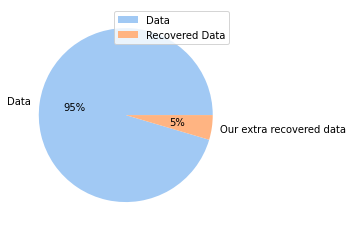

In [946]:
data = [7500, 360]
labels = ['Data', 'Our extra recovered data']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.legend(['Data', 'Recovered Data'])
plt.show()

In [1021]:
produsts_categorization_df

,Unnamed: 0,sku,name,desc,promo_price,in_stock,type,max_price,price,new_type,category
0,0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,499.899,1,8.696000e+03,54.99,54.99,8696,Acessory
1,1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,589.996,0,1.385540e+07,60.49,60.49,5401,Replacement Parts
2,2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,569.898,0,1.387000e+03,59.00,59.00,1387,Acessory
3,3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,229.997,0,1.230000e+03,25.00,25.00,1230,Acessory
4,4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,31.99,1,1.364000e+03,35.71,35.71,1364,Storage
...,...,...,...,...,...,...,...,...,...,...,...
7824,7824,MMW0012,"My MW Case MacBook Pro 13 ""(Late 2016) Blue Sa...",Avoid shock and damage to your MacBook Pro 13-...,20.99,0,1.383540e+07,22.99,22.99,5403,Acessory
7825,7825,MMW0013,"My MW Case MacBook Pro 13 ""(Late 2016) White S...",Avoid shock and damage to your MacBook Pro 13-...,20.99,1,1.383540e+07,22.99,22.99,5403,Acessory
7826,7826,MMW0016,"My MW Case MacBook Pro 13 ""(Late 2016) Black",Avoid shock and damage to your MacBook Pro 13-...,20.99,1,1.383540e+07,22.99,22.99,5403,Acessory
7827,7827,MMW0015,"My MW Case MacBook Pro 13 ""(Late 2016) Gray",Avoid shock and damage to your MacBook Pro 13-...,20.99,1,1.383540e+07,22.99,22.99,5403,Acessory


In [1107]:
orders_complated = orders_cleaned.query('state == "Completed"')

main_table= (
orderlines_cleaned
                .loc[orderlines_cleaned['id_order'].isin(orders_complated['order_id'])]
                .assign(total_price = orderlines_cleaned['product_quantity']*orderlines_cleaned['unit_price'])
                .merge(
                    produsts_categorization_df[['sku','price','category']],
                    how= 'inner',
                    on='sku'
                    )
                .assign(year = lambda df_ : df_['date'].dt.strftime('%Y'), 
                        month = lambda df_ : df_['date'].dt.strftime('%Y') + df_['date'].dt.strftime('%m'))
                .assign(cat = lambda df_ : df_['category'].isin(APPLE))
                # .assign(profit_p = np.where(lambda df_ : df_['cat'] == True , 0.15 , 0.70))
                .assign(discount= lambda df_ : round(df_['price'] - df_['unit_price'],2))
                .assign(total_discount= lambda df_ : round(df_['product_quantity']*(df_['price'] - df_['unit_price']),2))
                .assign(discount_percentage= lambda df_ : round(((df_['price'] - df_['unit_price']) / df_['price']) * 100, 2))
                # .assign(total_profit = lambda df_ : df_['price'] * df_['profit_p']*df_['product_quantity'] - df_['discount']*df_['product_quantity'])
                # .groupby('id_order')
                # .agg({'id_order':'count', 'category': 'sum'})
                # .loc[lambda df_ : df_['id_order']>1]
                # .loc[lambda df_ : df_['category'].str.contains(r'IPAD|IPOD')]
)

# main_table=(
# main_table
#         .assign(profit_p = np.where(main_table['cat'] == True , 0.20 , 0.50))
#         .assign(total_profit = lambda df_ : df_['price'] * df_['profit_p']*df_['product_quantity'] - df_['discount']*df_['product_quantity'])
# )

profit from discount and non discount sells:

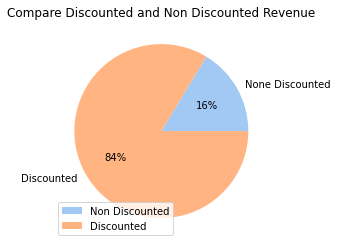

In [1118]:
dis_or_not = (
main_table 
        .assign(disconted = lambda df_ : df_['discount'] > 0)
        .groupby('disconted')
        .agg(revenue =('total_price', 'sum'), sell_count =('product_quantity', 'sum') )
)

labels = ['None Discounted', 'Discounted']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(dis_or_not['revenue'], labels = labels, colors = colors, autopct='%.0f%%')
plt.legend(['Non Discounted', 'Discounted'])
plt.ticklabel_format(style='plain', axis='y') # remove scientific notation for the y axis
plt.title('Compare Discounted and Non Discounted Revenue') # title
plt.show()

profit from discount and non discount sells per categories:

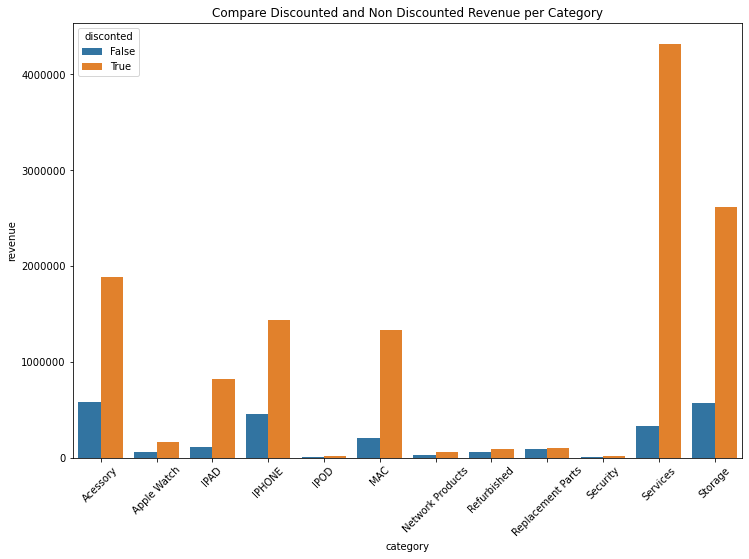

In [1119]:
dis_or_not_category = (
main_table 
        .assign(disconted = lambda df_ : df_['discount'] > 0)
        .groupby(['category','disconted'])
        .agg(revenue =('total_price', 'sum'), sell_count =('product_quantity', 'sum') )
        .reset_index()
)

plt.subplots(figsize=(12, 8))

p = sns.barplot(
    data=dis_or_not_category, # dataframe we will use to look for the columns information
    x='category', # x values on our chart
    y='revenue', # y values on our chart
    hue='disconted' # group color in our chart
    # order=months # order x columns
)

# p.axhline(
#     p_df['total_paid'].mean(), # value where you want to add your reference line
#     linestyle='--', # type of line you would like to see on the plot. You can find more informaiton on its documentation
#     color='gray'
# )

# plt.xlabel('Month') # x label name
# plt.ylabel('Total paid') # y label name
plt.title('Compare Discounted and Non Discounted Revenue per Category') # title
plt.ticklabel_format(style='plain', axis='y') # remove scientific notation for the y axis
plt.xticks(rotation=45)
plt.show() # show the plot

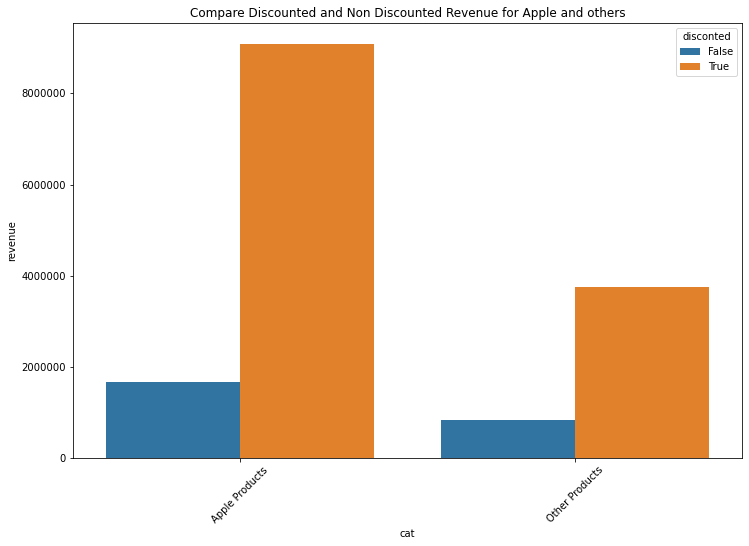

In [1120]:
dis_or_not_cat = (
main_table 
        .assign(disconted = lambda df_ : df_['discount'] > 0)
        .groupby(['cat','disconted'])
        .agg(revenue =('total_price', 'sum'), sell_count =('product_quantity', 'sum') )
        .reset_index()
)

plt.subplots(figsize=(12, 8))

p = sns.barplot(
    data=dis_or_not_cat, # dataframe we will use to look for the columns information
    x='cat', # x values on our chart
    y='revenue', # y values on our chart
    hue='disconted' # group color in our chart
    # order=months # order x columns
)

# p.axhline(
#     p_df['total_paid'].mean(), # value where you want to add your reference line
#     linestyle='--', # type of line you would like to see on the plot. You can find more informaiton on its documentation
#     color='gray'
# )

# plt.xlabel('Month') # x label name
# plt.ylabel('Total paid') # y label name
plt.ticklabel_format(style='plain', axis='y') # remove scientific notation for the y axis
plt.title('Compare Discounted and Non Discounted Revenue for Apple and others') # title
p.set_xticklabels(['Apple Products', 'Other Products']) 
plt.xticks(rotation=45)
plt.show() # show the plot

In [1109]:


months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
def filter_percentage(percentage):
    if percentage <= 0:
        return 'no discount'
    if percentage < 10:
        return 'up to 10'
    if percentage < 20:
        return '10-20'
    if percentage < 30:
        return '20-30'
    if percentage < 40:
        return '30-40'
    else:
        return 'other'
    
    ef filter_price(price):

    if price < 100:
        return 'up to 100€'
    if price < 500:
        return '100-500€'
    if price < 1000:
        return '500-1000€'
    if price < 2000:
        return '1000-2000€'
    if price < 3000:
        return '2000-3000€'
    if price > 3000:
        return 'over 3000€'

price_cat = ['up to 100€', '100-500€', '500-1000€', '1000-2000€', '2000-3000€', 'over 3000€']
  
#applying the filter function to 'discount_percentage' column 
ol_products['price_category'] = ol_products['total_price'].apply(filter_price)
#applying the filter function to 'discount_percentage' column 
discount_month = main_table.copy()
discount_month['discount_category'] = discount_month['discount_percentage'].apply(filter_percentage)
discount_month

,id_order,product_id,product_quantity,sku,date,unit_price,total_price,price,category,year,month,cat,discount,total_discount,discount_percentage,discount_category
0,299545,0,1,OWC0100,2017-01-01 01:46:16,47.49,47.49,64.63,Acessory,2017,201701,False,17.14,17.14,26.52,20-30
1,299404,0,1,OWC0100,2017-01-01 22:50:39,47.49,47.49,64.63,Acessory,2017,201701,False,17.14,17.14,26.52,20-30
2,300650,0,1,OWC0100,2017-01-02 15:31:09,49.99,49.99,64.63,Acessory,2017,201701,False,14.64,14.64,22.65,20-30
3,300760,0,1,OWC0100,2017-01-02 17:20:31,49.99,49.99,64.63,Acessory,2017,201701,False,14.64,14.64,22.65,20-30
4,301975,0,1,OWC0100,2017-01-03 20:04:54,49.99,49.99,64.63,Acessory,2017,201701,False,14.64,14.64,22.65,20-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59967,526066,0,1,WAC0254,2018-03-12 17:45:42,83.99,83.99,86.99,IPAD,2018,201803,True,3.00,3.00,3.45,up to 10
59968,526093,0,1,WAC0252,2018-03-12 18:32:29,83.99,83.99,83.99,IPAD,2018,201803,True,0.00,0.00,0.00,no discount
59969,526212,0,1,APP2067-A,2018-03-12 23:28:51,1181.33,1181.33,1187.70,Services,2018,201803,False,6.37,6.37,0.54,up to 10
59970,526440,0,1,PAC2235,2018-03-13 15:08:27,878.18,878.18,965.18,Storage,2018,201803,False,87.00,87.00,9.01,up to 10


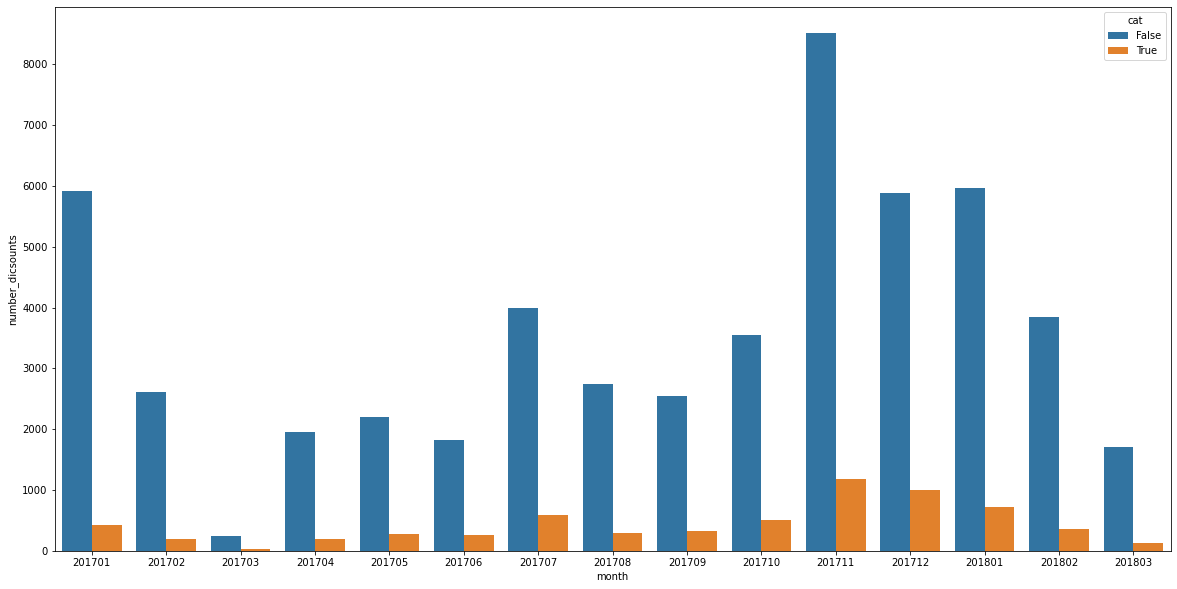

In [1117]:
discount_month_result = (
discount_month
      .groupby(['month','cat'])
      .agg(number_dicsounts=('total_discount' , 'count'))
      .reset_index()
)
discount_month_result
plt.subplots(figsize=(20, 10))

# months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
#           'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

p = sns.barplot(
    data=discount_month_result,
    x='month',
    y='number_dicsounts',
    hue= 'cat',
    # order=months,
    # palette='GnBu',
  
)
plt.ticklabel_format(style='plain', axis='y') # remove scientific notation for the y axis
# plt.ylim(0, 400000)
# # # plt.xlabel('Month')
# # plt.ylabel('Number of Orders')
# # plt.title('2017 Orders')
plt.show()

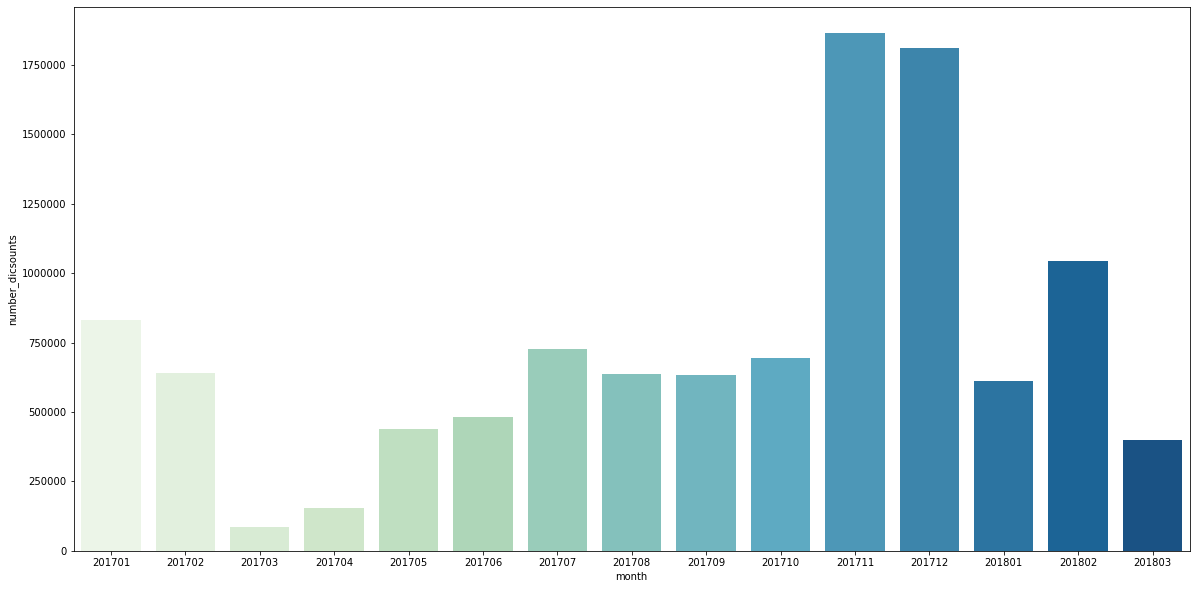

In [1088]:
discount_month_result = (
orderlines_cleaned
      .loc[orderlines_cleaned['id_order'].isin(orders_complated['order_id'])]
      .assign(total_price = orderlines_cleaned['product_quantity']*orderlines_cleaned['unit_price'])
      .assign(year = orders['created_date'].dt.strftime('%Y'), 
                        month = orders['created_date'].dt.strftime('%Y') + orders['created_date'].dt.strftime('%m'))
      .groupby(['month'])
      .agg(number_dicsounts=('total_price' , 'sum'))
      .reset_index()
)
discount_month_result
plt.subplots(figsize=(20, 10))

# months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
#           'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

p = sns.barplot(
    data=discount_month_result,
    x='month',
    y='number_dicsounts',
    # hue= 'discount_category',
    # order=months,
    palette='GnBu',
  
)
plt.ticklabel_format(style='plain', axis='y') # remove scientific notation for the y axis
# plt.ylim(0,100000)
# # # plt.xlabel('Month')
# # plt.ylabel('Number of Orders')
# # plt.title('2017 Orders')
plt.show()

In [1101]:
produsts_ =  pd.read_csv('./products_cleaned.csv')
temp_main = (
orderlines_cleaned
                .merge(produsts_ , on= 'sku')
                .loc[lambda df_ : df_['id_order'].isin(orders_complated['order_id'])]
                .assign(total_price = lambda df_ : df_['product_quantity']*df_['unit_price'])
                .assign(year = lambda df_ : df_['date'].dt.strftime('%Y'), 
                        month = lambda df_ : df_['date'].dt.strftime('%Y') + df_['date'].dt.strftime('%m'))
)

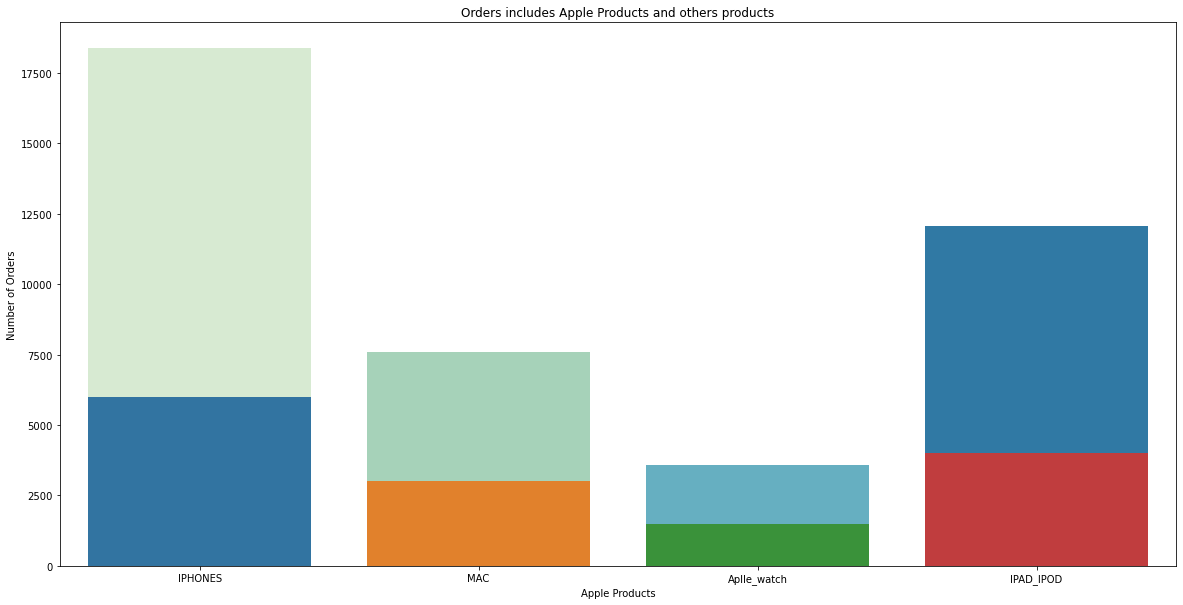

In [1128]:
labels = ['IPHONES', 'MAC', 'Aplle_watch', 'IPAD_IPOD']
all = [18382, 7590, 3591, 12077]
witt_acce = [5000, 3000,1500, 4000]

plt.subplots(figsize=(20, 10))

# months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
#           'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

p = sns.barplot(
    # data=discount_month_result,
    x=labels,
    y= all,
    # hue= 'discount_category',
    # order=months,
    palette='GnBu', 
)
sns.barplot(
    # data=discount_month_result,
    x=labels,
    y= witt_acce,
    # hue= 'discount_category',
    # order=months,
    # palette='GnBu', 
)
plt.ticklabel_format(style='plain', axis='y') # remove scientific notation for the y axis
# plt.ylim(0,100000)
plt.xlabel('Apple Products')
plt.ylabel('Number of Orders')
plt.title('Orders includes Apple Products and others')
plt.show()